In [82]:
import numpy as np
from numpy import random as random
import matplotlib.pyplot as plt


In [83]:
size=50
maxlim=82.47 #Average Deviation For EUR/USD
seed=1000 #+int(input("Seed"))
zero=0
threshold=0.3
Total=1000
commission=10/100
stopLoss=100
stopProfit=5000
amount=0
openTrades=np.zeros((size,2))
start=Total
Trades=0
buyTrade=0
sellTrade=0
INTProfit=0
backDiff=int(size/8)

In [84]:

timeArr=np.zeros(size)
buy=np.zeros(size)
priceAverage=np.zeros(size)
priceVelocity=np.zeros(size)
priceGlobal=np.zeros(size)
priceAcceleration=np.zeros(size)
profit=np.zeros(size)


In [85]:
def R(arr,n,size,MAX,SEED,useseed):
    if(useseed==True):
        random.seed(SEED)
    return  ( int(arr[(np.clip(n-1,0,size))])  +  ((random.randint(-MAX,MAX))))

In [86]:
def graph(x):
    global Total
    global Trades
    global priceGlobal
    global priceAverage
    global priceAcceleration
    global priceVelocity
    global openTrades
    global buy
    global profit
    global sellTrade
    global buyTrade
    global INTProfit
    plt.clf()
    
    plt.title("Total Trades:{} Sell:{} Buy:{} profit {}".format(buyTrade+sellTrade,sellTrade,buyTrade,INTProfit))

    plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(priceGlobal,(max(x-1,0))))
    plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(priceAverage,(max(x-1,0))))
    #plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(buy,(max(x-1,0))))
    #plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(openTrades,(max(x-1,0))))
    #plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(Trades,(max(x-1,0))))
    plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(profit,(max(x-1,0))))
    #plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(priceVelocity,(max(x-1,0))))
    #plt.plot(np.resize(timeArr,(max(x-1,0))),np.resize(priceAcceleration,(max(x-1,0))))
    #plt.plot(np.resize(timeArr,(max(x-1,0))),np.full((max(x-1,0)),profit[x]))
   
    plt.savefig("Img/{}.png".format(x),dpi=800)
    plt.show

In [87]:
def processData(x):
    global Total
    global Trades
    global priceGlobal
    global priceAverage
    global priceAcceleration
    global priceVelocity
    global openTrades
    global buy

    priceAverage[(x)]=(priceGlobal[(x)]+priceGlobal[(max(0,x-backDiff))])/2
    priceVelocity[(x)]=priceAverage[(x)]-priceAverage[(max(0,x-backDiff))]
    priceAcceleration[(x)]=priceVelocity[(x)]-priceVelocity[(max(0,x-1))]
    


In [88]:
def predict(price,Acceleration,zero,index):
    if((Acceleration>0)and(price>zero)):
        buy[(index)]=1
    elif((Acceleration>0)and(price<zero)):
        buy[(index)]=-1

In [89]:
def run(Useseed):
    global Total
    global Trades
    global priceGlobal
    global priceAverage
    global priceAcceleration
    global priceVelocity
    global openTrades
    global buy
    global profit
    global Maximum
    global Minimum
    global buyTrade
    global sellTrade
    global INTProfit

    for x in range(size):
        
        priceGlobal[(x)] = R(priceGlobal,x,size,maxlim,seed+x,Useseed)
        timeArr[(x)]=x
        processData(x)

        zero=np.mean(priceGlobal)
        Maximum=np.max(priceGlobal)
        Minimum=np.min(priceGlobal)

        predict(priceGlobal[(x)],priceAcceleration[(x)],zero,x)
        if(Total>stopLoss):
            if((buy[(x)])>0):
                buyTrade+=1
                Trades+=1
                Total=Total-(amount*priceGlobal[(x)])-commission
                openTrades[(x,0)]=1+openTrades[(max(x-1,0),0)]
                openTrades[(x,1)]=Total
                for price in openTrades:
                    if(priceGlobal[(x)]<price[1]):
                        Total=Total
                    elif(priceGlobal[(x)]>price[1]):
                        Total=Total+(priceGlobal[(x)]*amount)
                    
            elif((buy[(x)])<0):
                sellTrade+=1
                Trades+=1
                Total=Total-(amount*priceGlobal[(x)])-commission
                openTrades[(x,0)]=1+openTrades[(max(x-1,0),0)]
                openTrades[(x,1)]=Total
               
                for price in openTrades:
                    if(priceGlobal[(x)]<price[1]):
                        Total=Total+(priceGlobal[(x)]*amount)
                    elif(priceGlobal[(x)]>price[1]):
                        Total=Total
       
        else:
            #print(Total)
            #Total=Total+int(input("Add Funds"))
            break
        graph(x)
        INTProfit=Total-start
        profit[(x)]=Total-start
        #if(profit[(x)]>stopProfit):
        #    break    

    
        

    while(openTrades[(size-1,0)]>0):
        Total=Total+(amount*priceGlobal[(size-1)])
        openTrades[(size-1,0)]-=1

    profit[(size-1)]=Total-start  
           


def NeuralNet():
    global amount
    global threshold
    global seed
    global Trades
    global profit
    
    for x in range(1):  
        amount=10**(-2)
        
        run(True)
        
        
        Trades=0 

NeuralNet()


Made Profit : 0.0 Total : 1000.0 in 497 Trades out of 1000 Trades ,10 Buy,487 Sell

Made Profit : 0.0 Total : 1000.0 in 496 Trades out of 1000 Trades ,13 Buy,483 Sell


Made Profit : -49.60000000001128 Total : 950.3999999999887 in 496 Trades out of 1000 Trades ,13 Buy,483 Sell

Made Profit : -49.7000000000113 Total : 950.2999999999887 in 497 Trades out of 1000 Trades ,10 Buy,487 Sell

Made Profit : -52.70000000001198 Total : 947.299999999988 in 527 Trades out of 1000 Trades ,17 Buy,510 Sell

Made Profit : -49.60000000001128 Total : 950.3999999999887 in 496 Trades out of 1000 Trades ,13 Buy,483 Sell

Made Profit : -50.30000000001144 Total : 949.6999999999886 in 503 Trades out of 1000 Trades ,13 Buy,490 Sell

Made Profit : -50.90000000001157 Total : 949.0999999999884 in 509 Trades out of 1000 Trades ,14 Buy,495 Sell


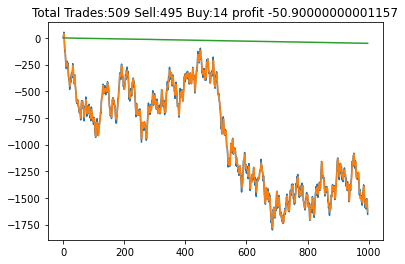

In [90]:


run(True)
print("Made Profit : {} Total : {} in {} Trades out of {} Trades ,{} Buy,{} Sell".format(profit[(size-1)],Total,Trades,size,buyTrade,sellTrade))